The Liquid Drop Model is a simple five-parameter model that can be used to calculate the binding energies of nuclei. The functional form of the model is given by:

\begin{equation}
B = a_V A - a_S A^{2/3} - a_C \frac{Z(Z-1)}{A^{1/3}} - a_A \frac{(A-2Z)^2}{A} + \delta(Z,A)
\end{equation}

where: 
 - $B$ is the nuclear binding energy,
 - $A$ is the total number of nucleons in the nucleus, 
 - $Z$ is the number of protons, 
 - $a_V$ is the Volume Term parameter, 
 - $a_S$ is the Surface Term parameter,
 - $a_C$ is the Coulomb Term parameter,
 - $a_A$ is the Asymmetry Term parameter, and 
 - $\delta$ is the Pairing Term parameter and is given by:

\begin{equation}
\delta(Z,A) = {\Big \{} \substack{
a_P A^{-3/4},\,\,\, Z,N\, even \\
0,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, A\, odd \\
-a_P A^{-3/4},\,\,\, Z,N\, odd}
\end{equation}

Common values for the five model parameters are: $a_V$ = 15.5 MeV, $a_S$ = 16.8 MeV, $a_C$ = 0.72 MeV, $a_A$ = 23 MeV, and $a_P$ = 34 MeV.

Let's define a function so that we can quickly calculate LDM binding energies for nuclei with arbitrary $Z$ and $A$:

In [1]:
def LDM_binding_energy( Z, A ):
    #Define the model parameters
    a_V = 15.5 #MeV
    a_S = 16.8 #MeV
    a_C = 0.72 #MeV
    a_A = 23.0 #MeV
    a_P = 34.0 #MeV
    
    #Calculate the first four terms
    volume_term = a_V * A
    surface_term = a_S * ( A**(2/3) )
    coulomb_term = a_C * ( Z*(Z-1) ) / ( A**(1/3) )
    asymmetry_term = a_A * ( (A - 2*Z)**2 ) / A
    
    #Determine the pairing term based on the oddness of the the nucleus:
    N = A - Z
    if( (Z % 2 == 0) and (N % 2 == 0) ):
        pairing_term = a_P * ( A**(-3/4) )
    elif( A % 2 != 0 ):
        pairing_term = 0.0
    elif( (Z % 2 != 0) and (N % 2 != 0) ):
        pairing_term = -a_P * ( A**(-3/4) )
    
    #Calculate the binding energy from the terms
    B = volume_term - surface_term - coulomb_term - asymmetry_term + pairing_term
    
    return B

This function will give us ***theoretically*** predicted nuclear binding energies.

To assess how well this model performs, we need to compare its results to ***empirical*** (measured) nuclear binding energies. Recall that nuclear binding energies are calculated as:

\begin{equation}
B = [Z m_{at}(^{1}H) + N m_n - m_{at}(Z,A)]c^2
\end{equation}

where: 
 - $A$ is the total number of nucleons in the nucleus, 
 - $Z$ is the number of protons, 
 - $m_{at}$ are atomic masses, and
 - $m_n$ is the mass of a neutron.
 
Thus we will need measured atomic masses of nuclei.

The atomic masses of can be downloaded from the [National Nuclear Data Center](nndc.bnl.gov) from the ["Atomic Mass Evaluation" page](http://amdc.impcas.ac.cn).

These masses have been downloaded and can be accessed using the function ```atomic_mass(Z, A)``` from ```fucntions.py```. There is also a function ```nuclei_with_empirical_masses()``` that tells us which nuclei have measured atomic masses. 

Import these functions:

In [2]:
from functions import atomic_mass, nuclei_with_empirical_masses

Now define a function to calculate binding energies from these atomic masses:

In [3]:
def empirical_binding_energy( Z, A ):
    #Get the number of neutrons
    N = A - Z
    
    #Get the atomic mass of a proton (1H) and the mass of a neutron
    m_1H = atomic_mass(1,1) #u
    m_n = 1.00866491 #u
    
    #Calculate the binding energy
    c2 = 931.502 
    B = ( Z*m_1H + N*m_n - atomic_mass(Z,A) ) * c2 #MeV
    
    return B

Now we want to calculate the LDM-predicted binding energy (per nucleon) for every nucleus for which we have empirical atomic mass data so that we can make a comparison to the empirical binding energies (per nucleon). 

List these nuclei, calculate their LDM binding energies per nucleon, and place them in a matrix for plotting. Make the x-axis of matrix $N$ neutron number and the y-axis $Z$ proton number:

In [4]:
#Get the list of nuclei with empirical atomic mass data
nuclei = nuclei_with_empirical_masses()

#Make empty matrices to store the empirical and LDM binding energies
import numpy
empirical_binding_energies = numpy.zeros( (150,200) ) * numpy.nan
LDM_binding_energies = numpy.zeros( (150,200) ) * numpy.nan

#Fill the matrices with the empirical and LDM binding energies
for nucleus in nuclei:
    Z = nucleus[0]
    A = nucleus[1]
    N = A - Z
    
    empirical_binding_energies[Z,N] = empirical_binding_energy( Z, A ) / A
    
    LDM_binding_energies[Z,N] = LDM_binding_energy( Z, A ) / A

Now plot the two matrices to see the comparison:

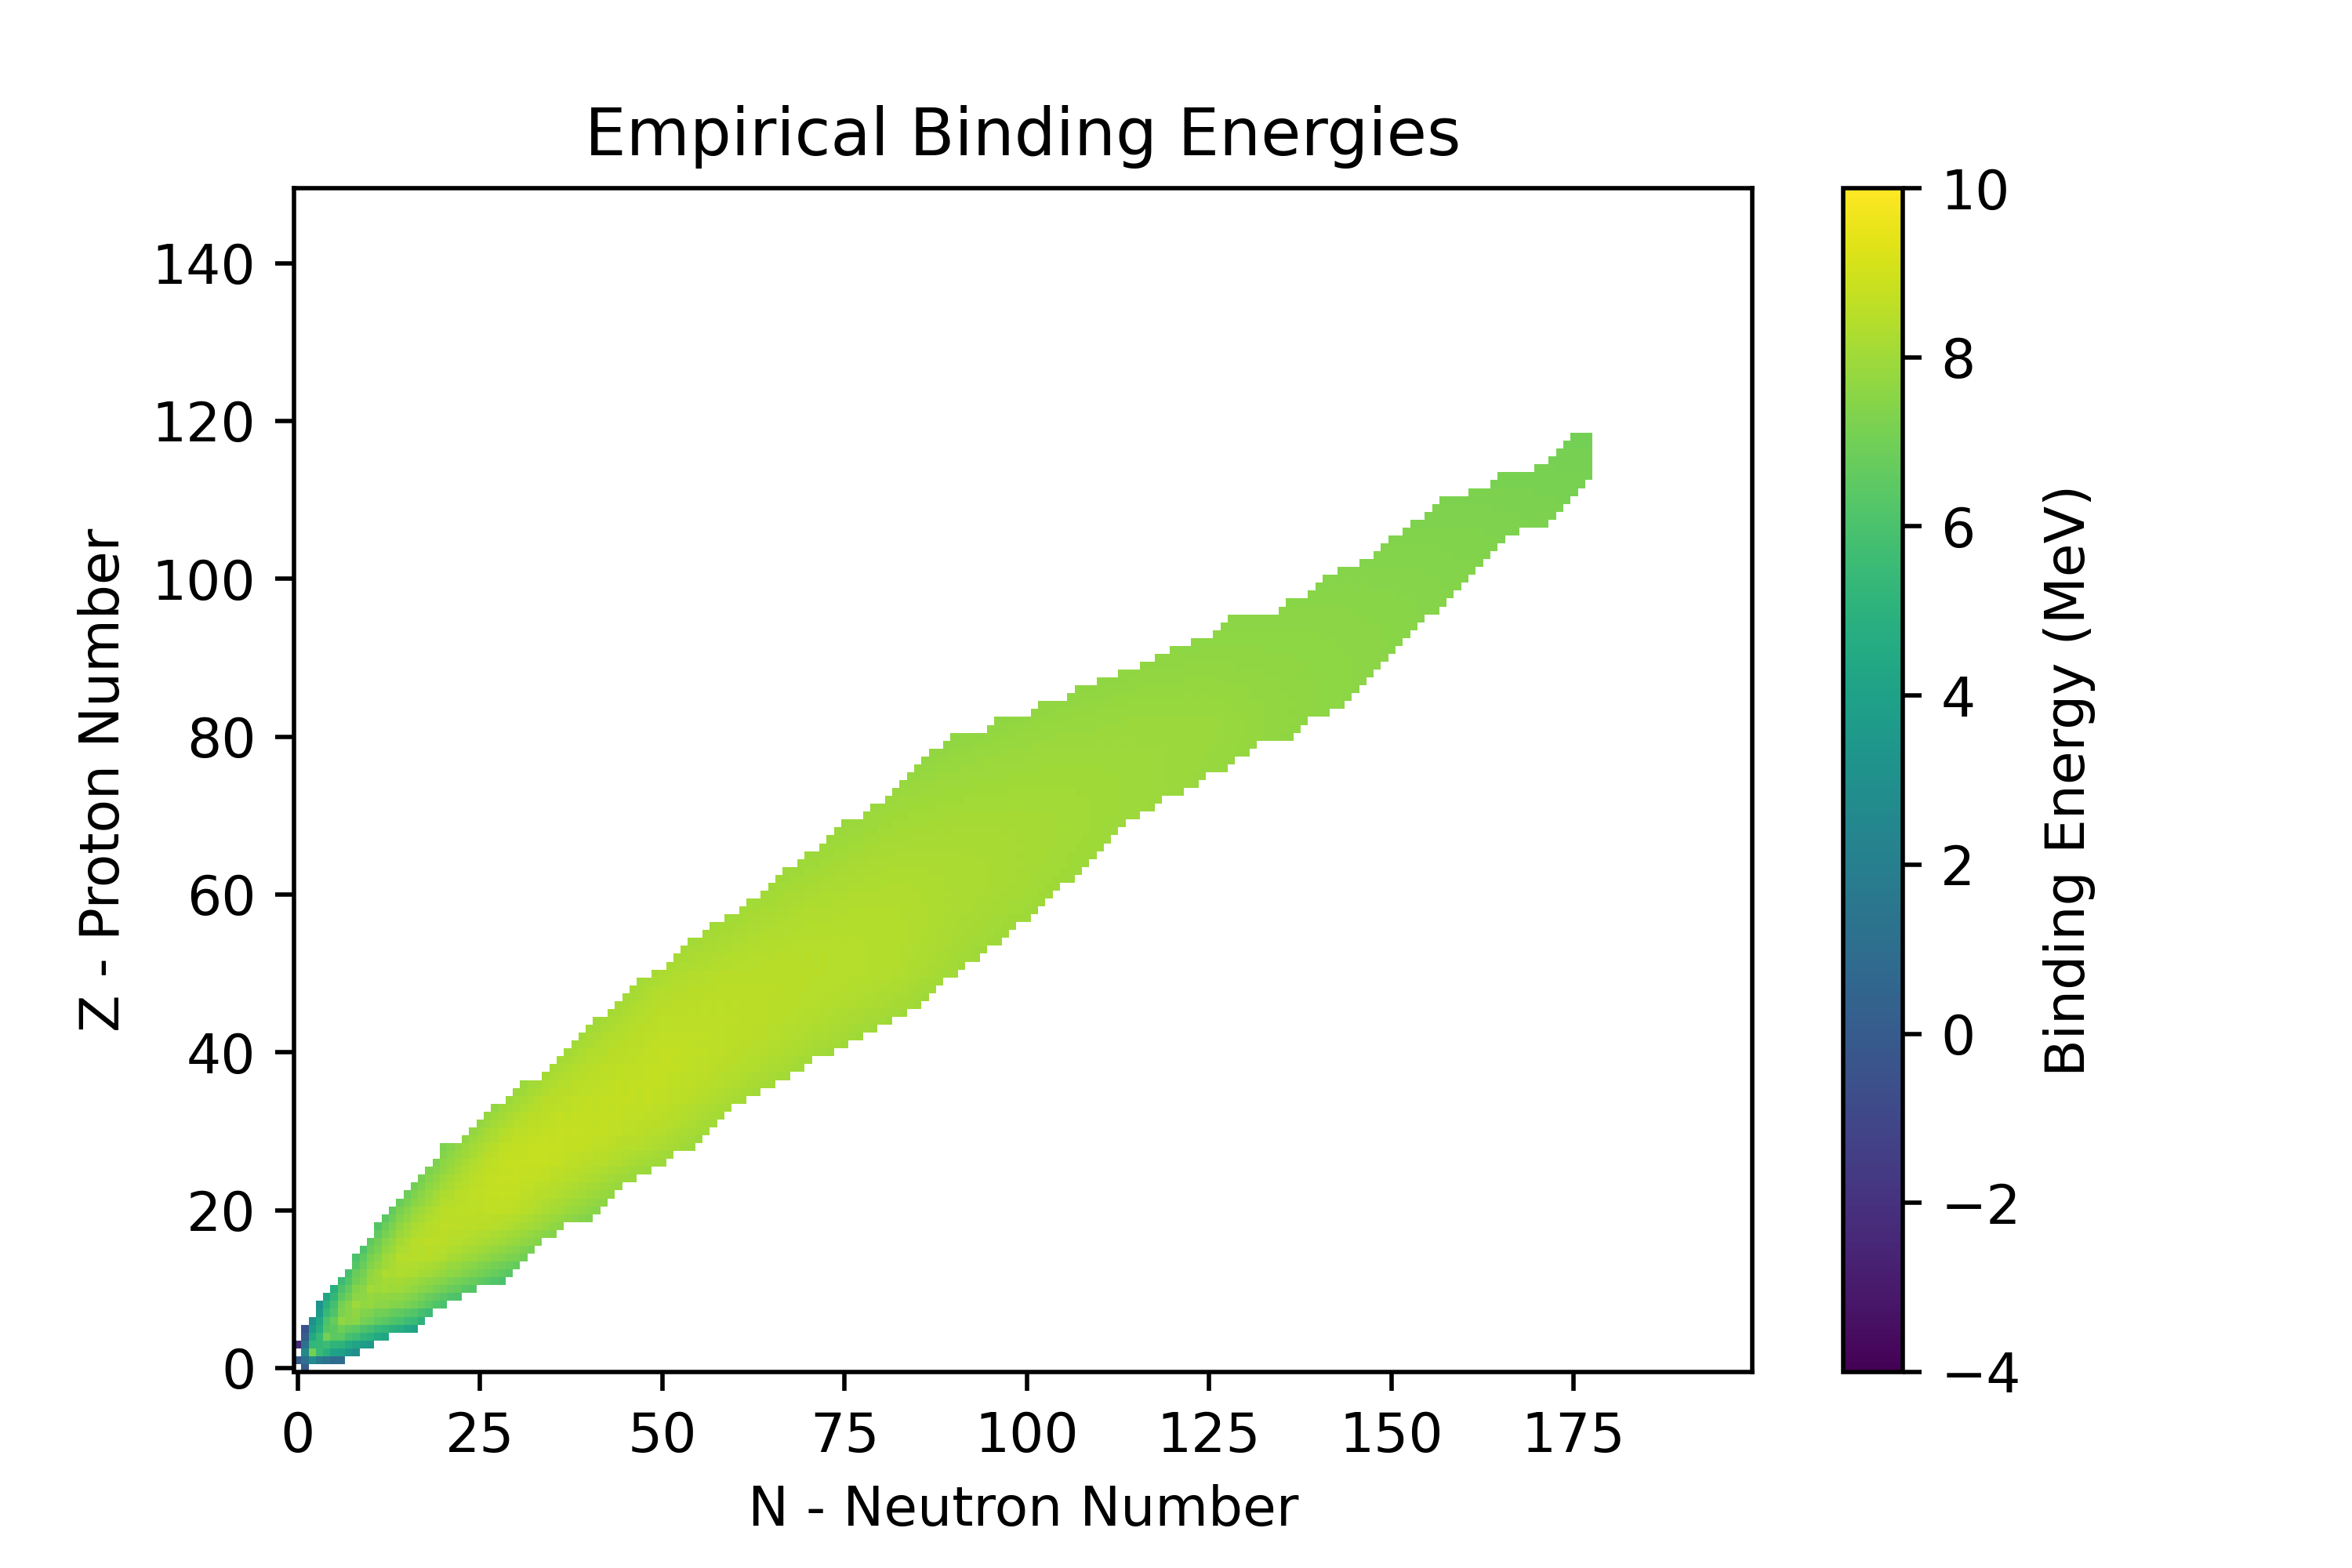

<Figure size 432x288 with 0 Axes>

In [5]:
#Import plotting software
import matplotlib.pyplot as plot
from IPython.display import Image

#Plot the empirical binding energies
plot.imshow( empirical_binding_energies, origin='lower', aspect='auto', vmin=-4.0, vmax=10.0 )
cbar = plot.colorbar() 
cbar.set_label( 'Binding Energy (MeV)' )
plot.set_cmap('viridis') #Pick a perceptually uniform color map
plot.title( 'Empirical Binding Energies' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )
plot.savefig( 'empirical_binding_energies.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'empirical_binding_energies.png' )

And display those matrices:

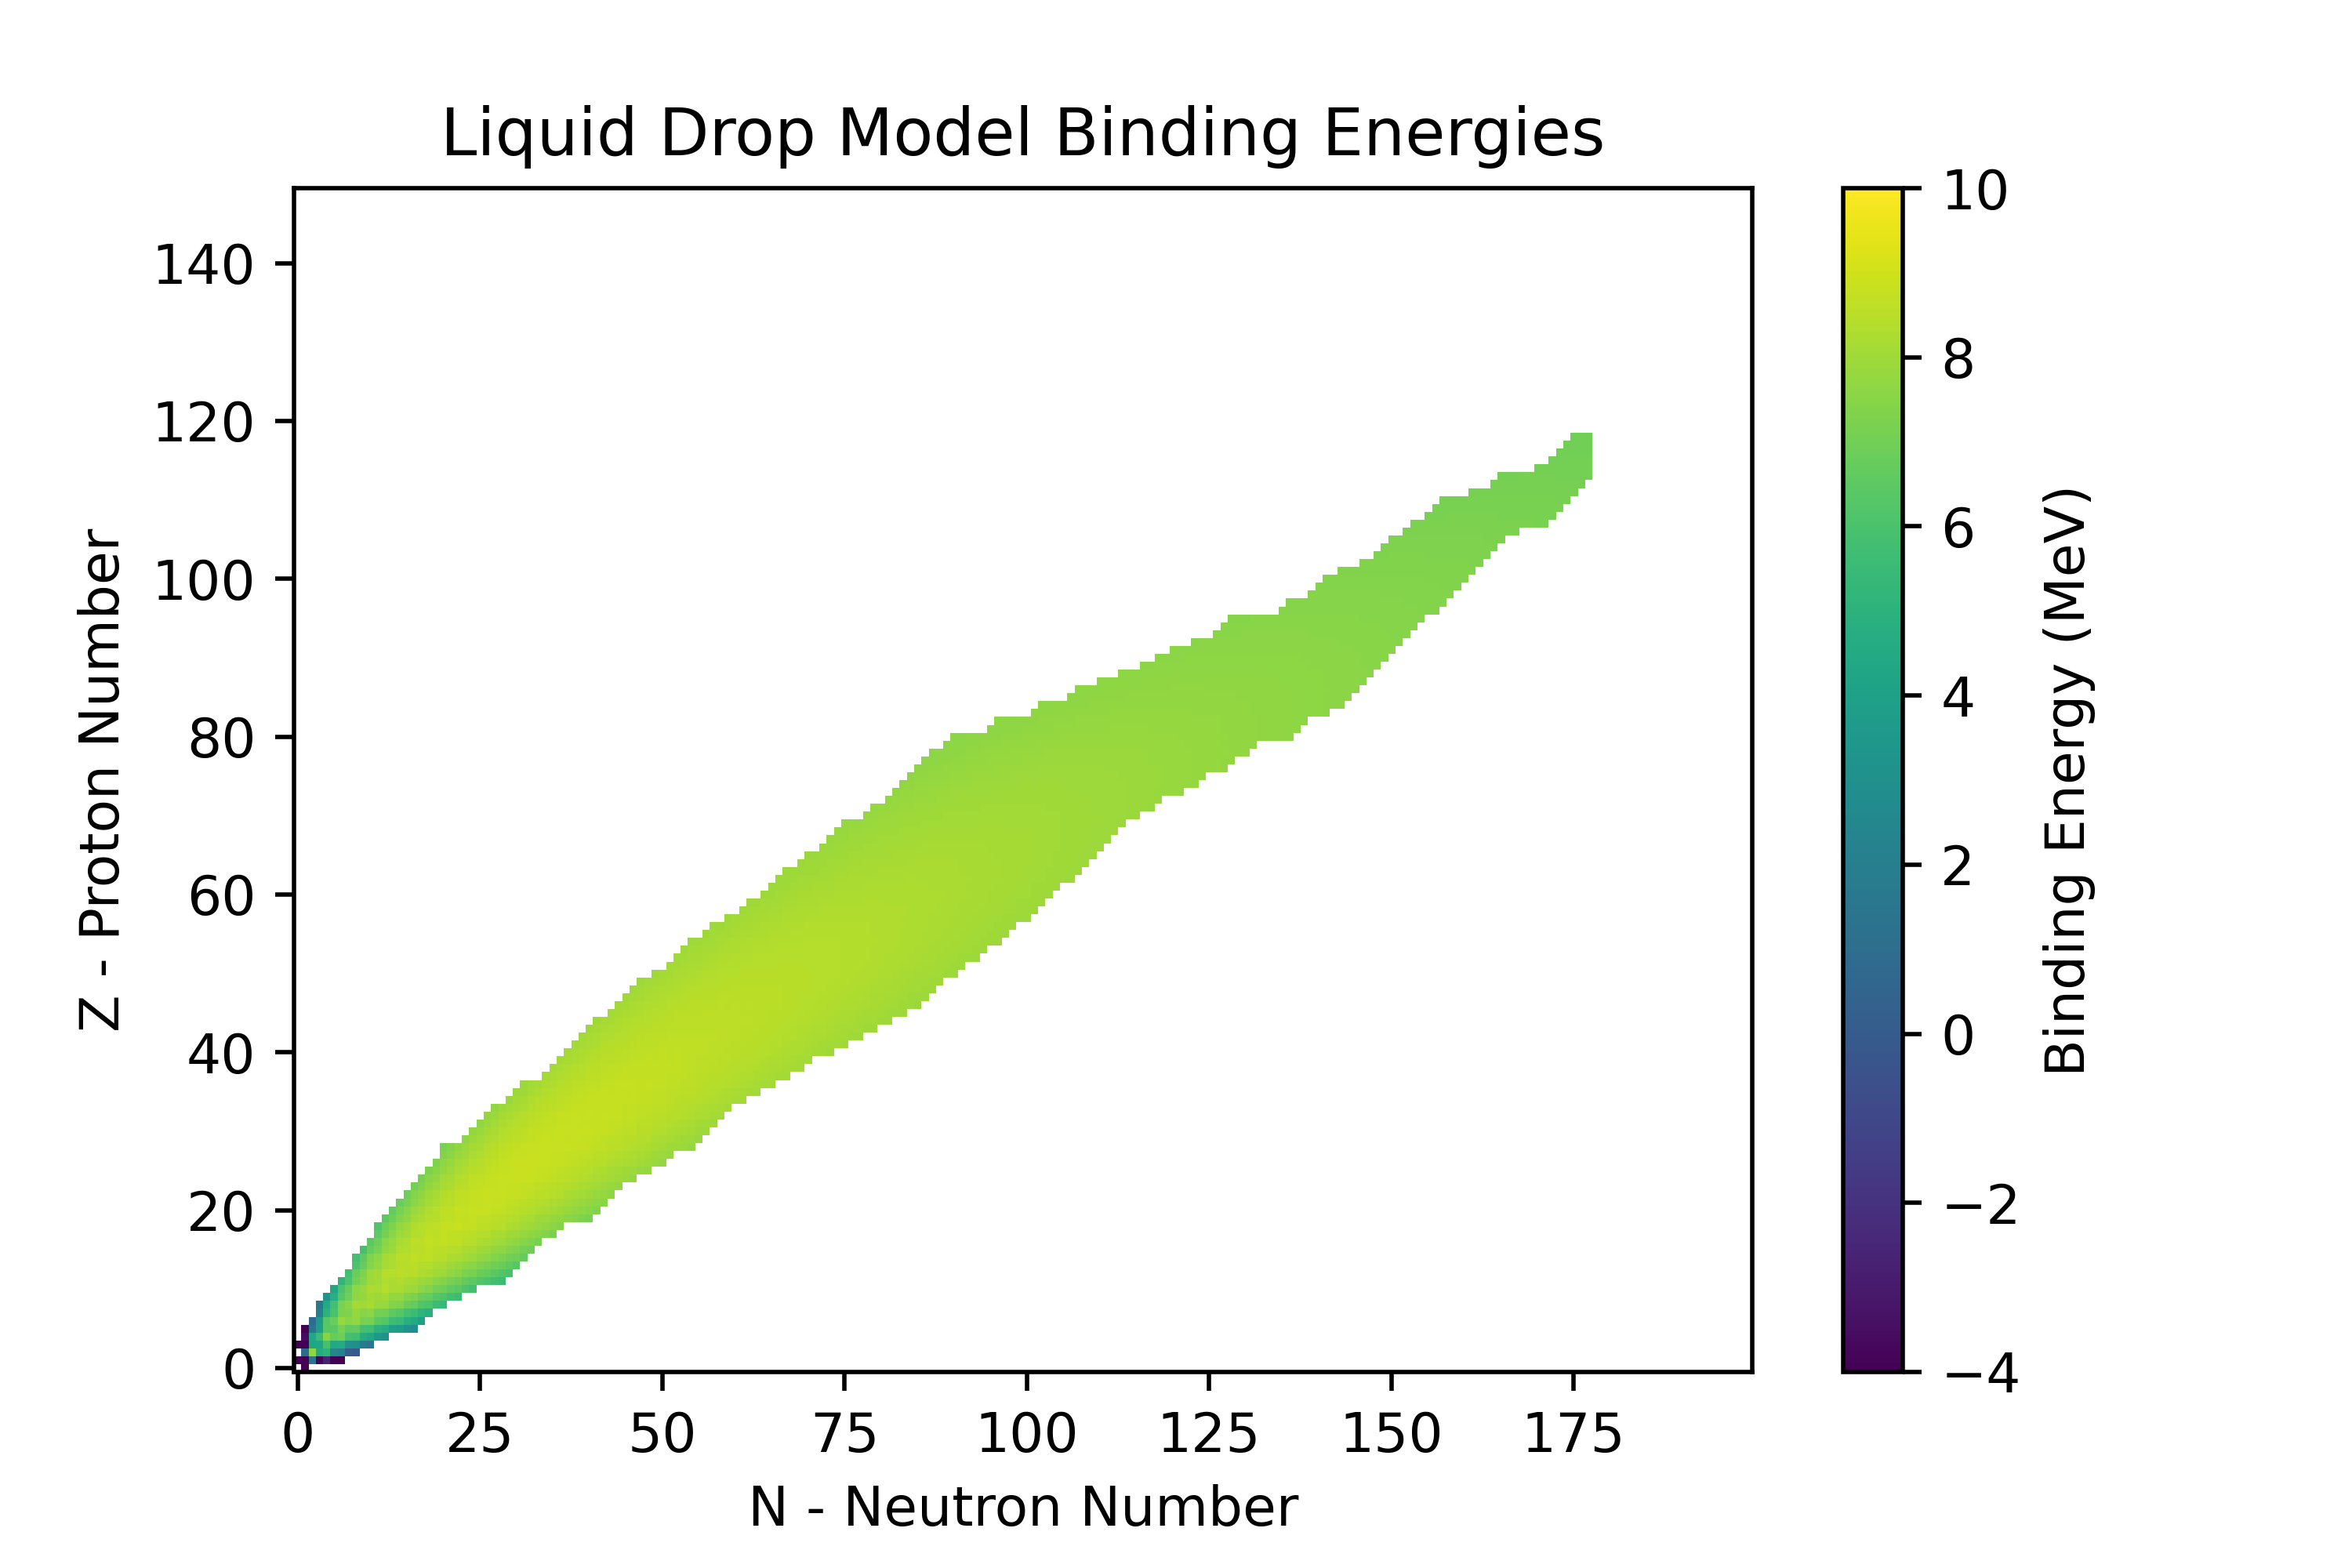

<Figure size 432x288 with 0 Axes>

In [6]:
#Plot the LDM binding energies
plot.imshow( LDM_binding_energies, origin='lower', aspect='auto', vmin=-4.0, vmax=10.0 )
cbar = plot.colorbar()
cbar.set_label( 'Binding Energy (MeV)' )
plot.set_cmap('viridis') #Pick a perceptually uniform color map
plot.title( 'Liquid Drop Model Binding Energies' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )
plot.savefig( 'LDM_binding_energies.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'LDM_binding_energies.png' )

We see some differences, but overall these look similar. Let's plot the difference (both percent and absolute) between the matrices to better see the differences:

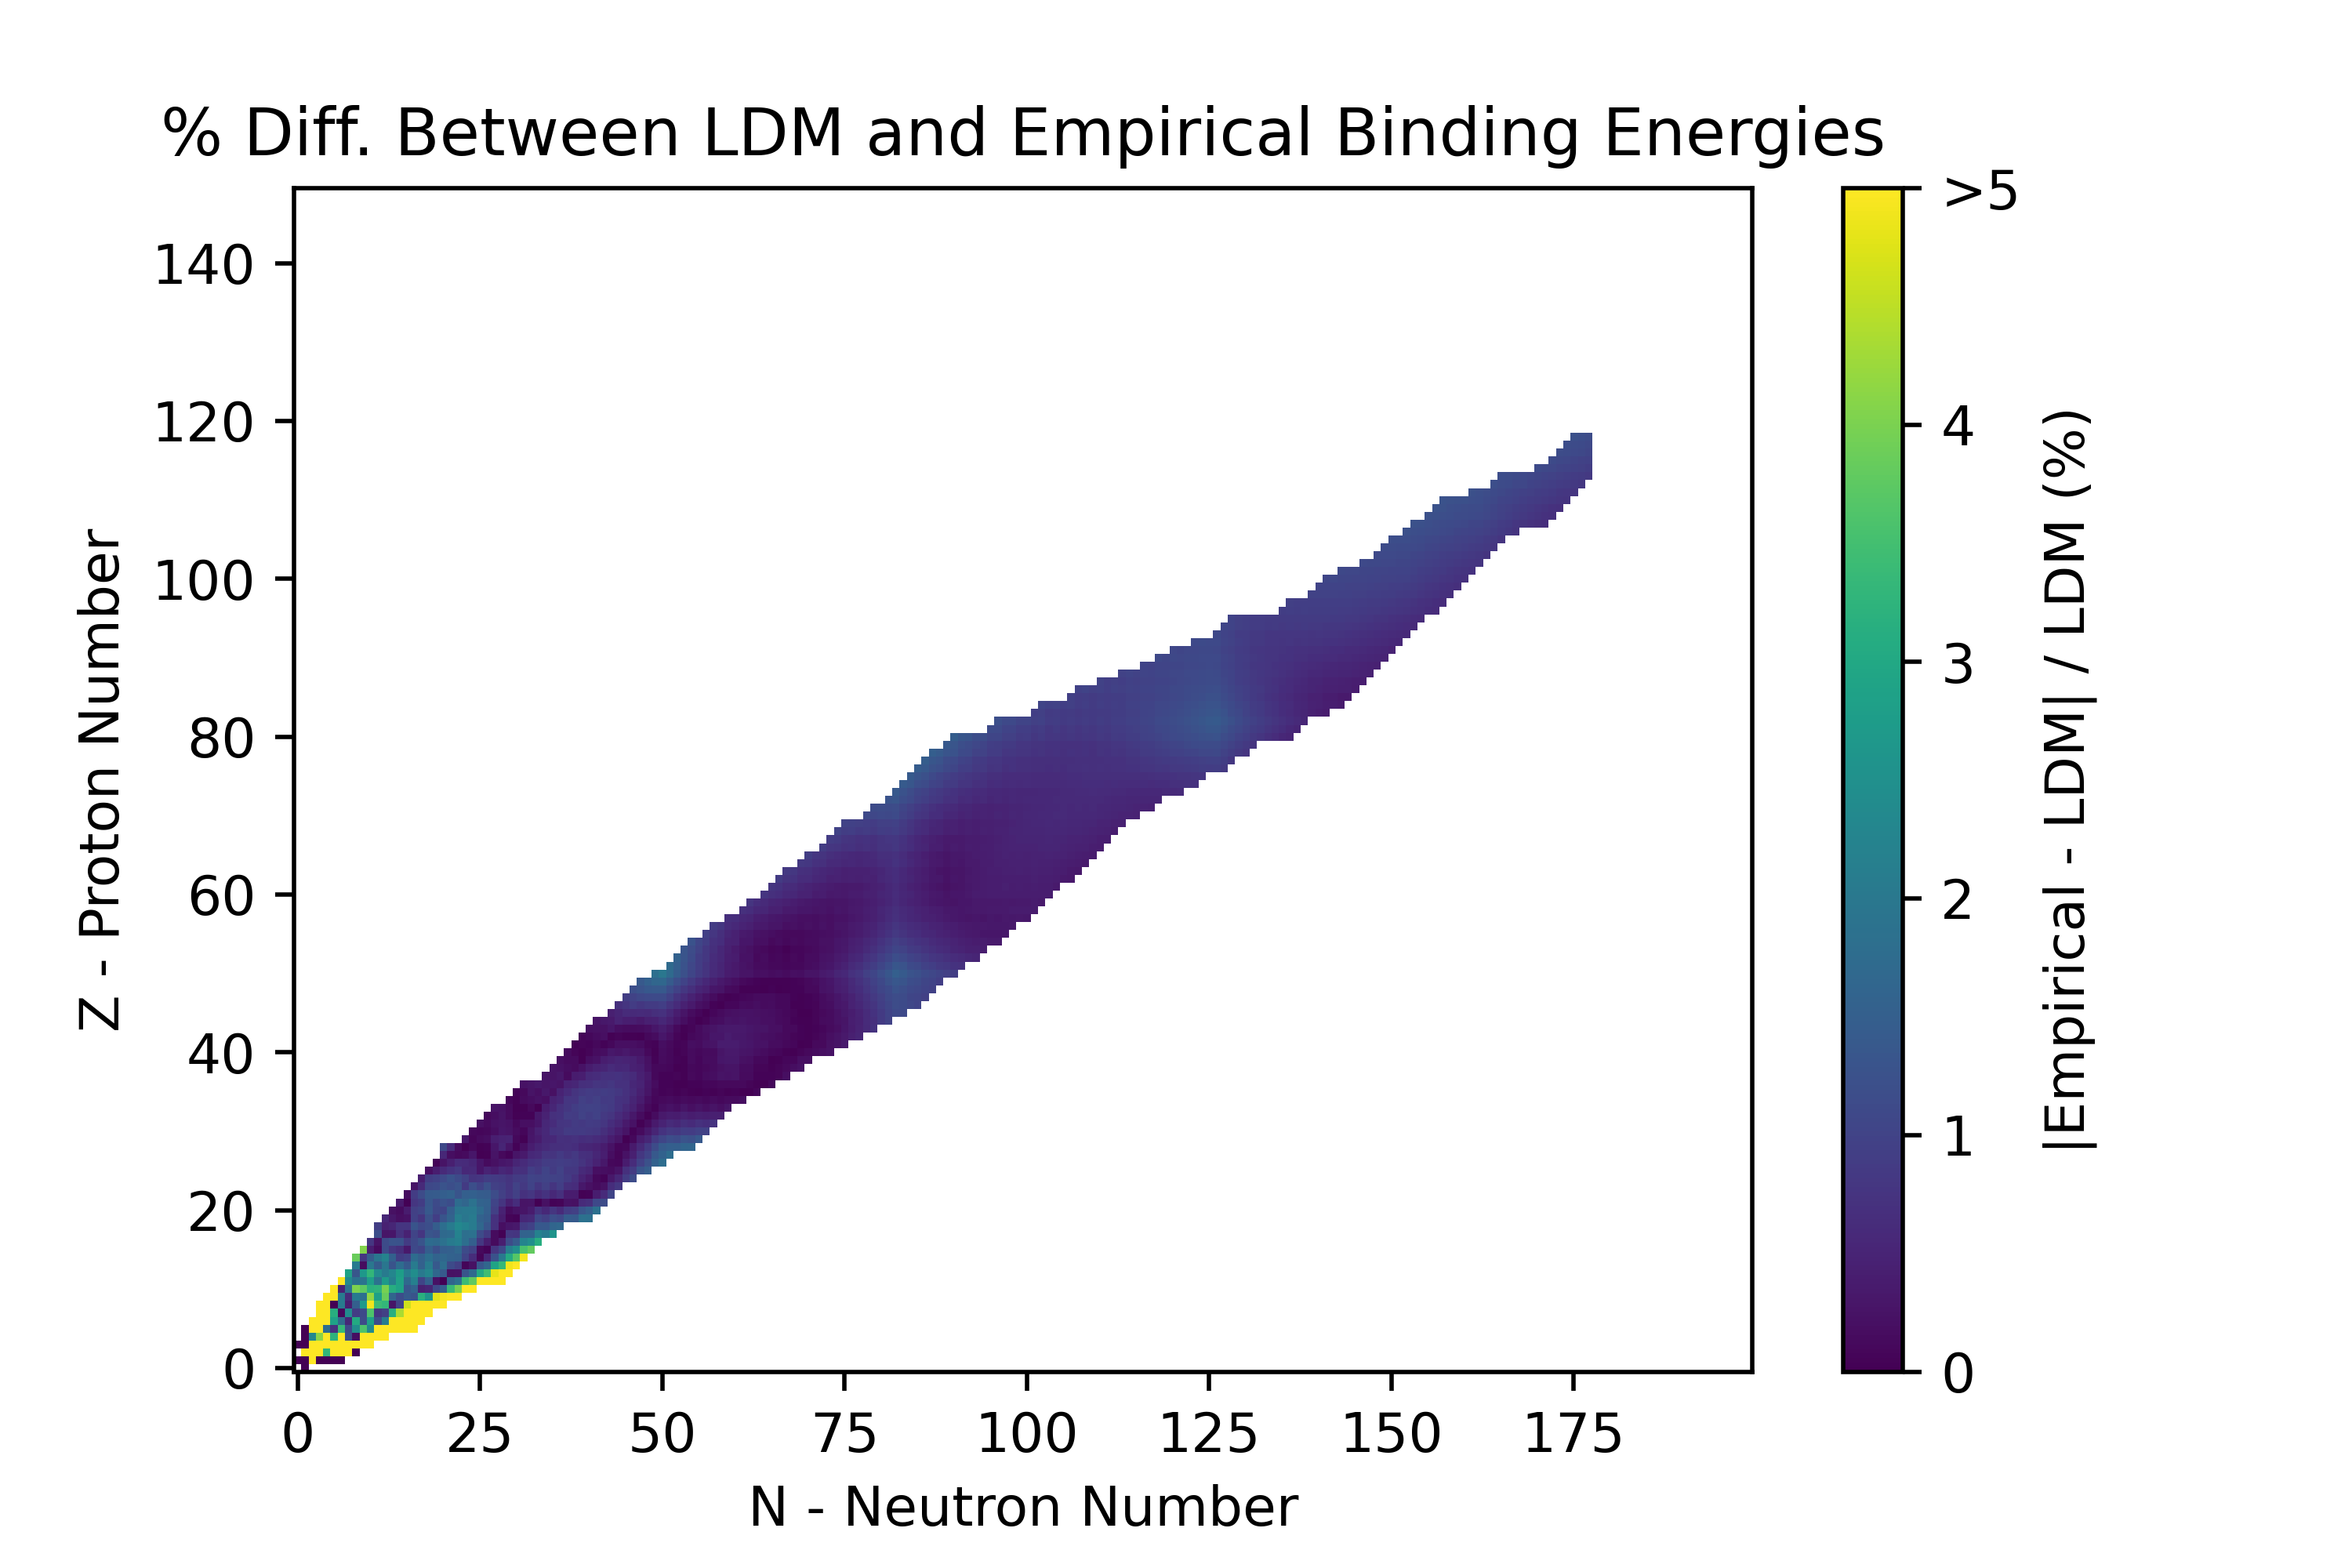

<Figure size 432x288 with 0 Axes>

In [7]:
#Calculate the percent difference
perc_diff = 100.0 * numpy.abs( empirical_binding_energies - LDM_binding_energies ) / LDM_binding_energies

#Plot the percent difference
plot.imshow( perc_diff, origin='lower', aspect='auto', vmin=0.0, vmax=5.0 )
cbar = plot.colorbar()
cbar.set_ticks( [0, 1, 2, 3, 4, 5] )
cbar.set_ticklabels( ['0', '1', '2', '3', '4', '>5'] )
cbar.set_label( '|Empirical - LDM| / LDM (%)' )
plot.set_cmap( 'viridis' ) #Pick a perceptually uniform color map
plot.title( '% Diff. Between LDM and Empirical Binding Energies' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )
plot.savefig( 'binding_energies_percent_differences.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'binding_energies_percent_differences.png' )

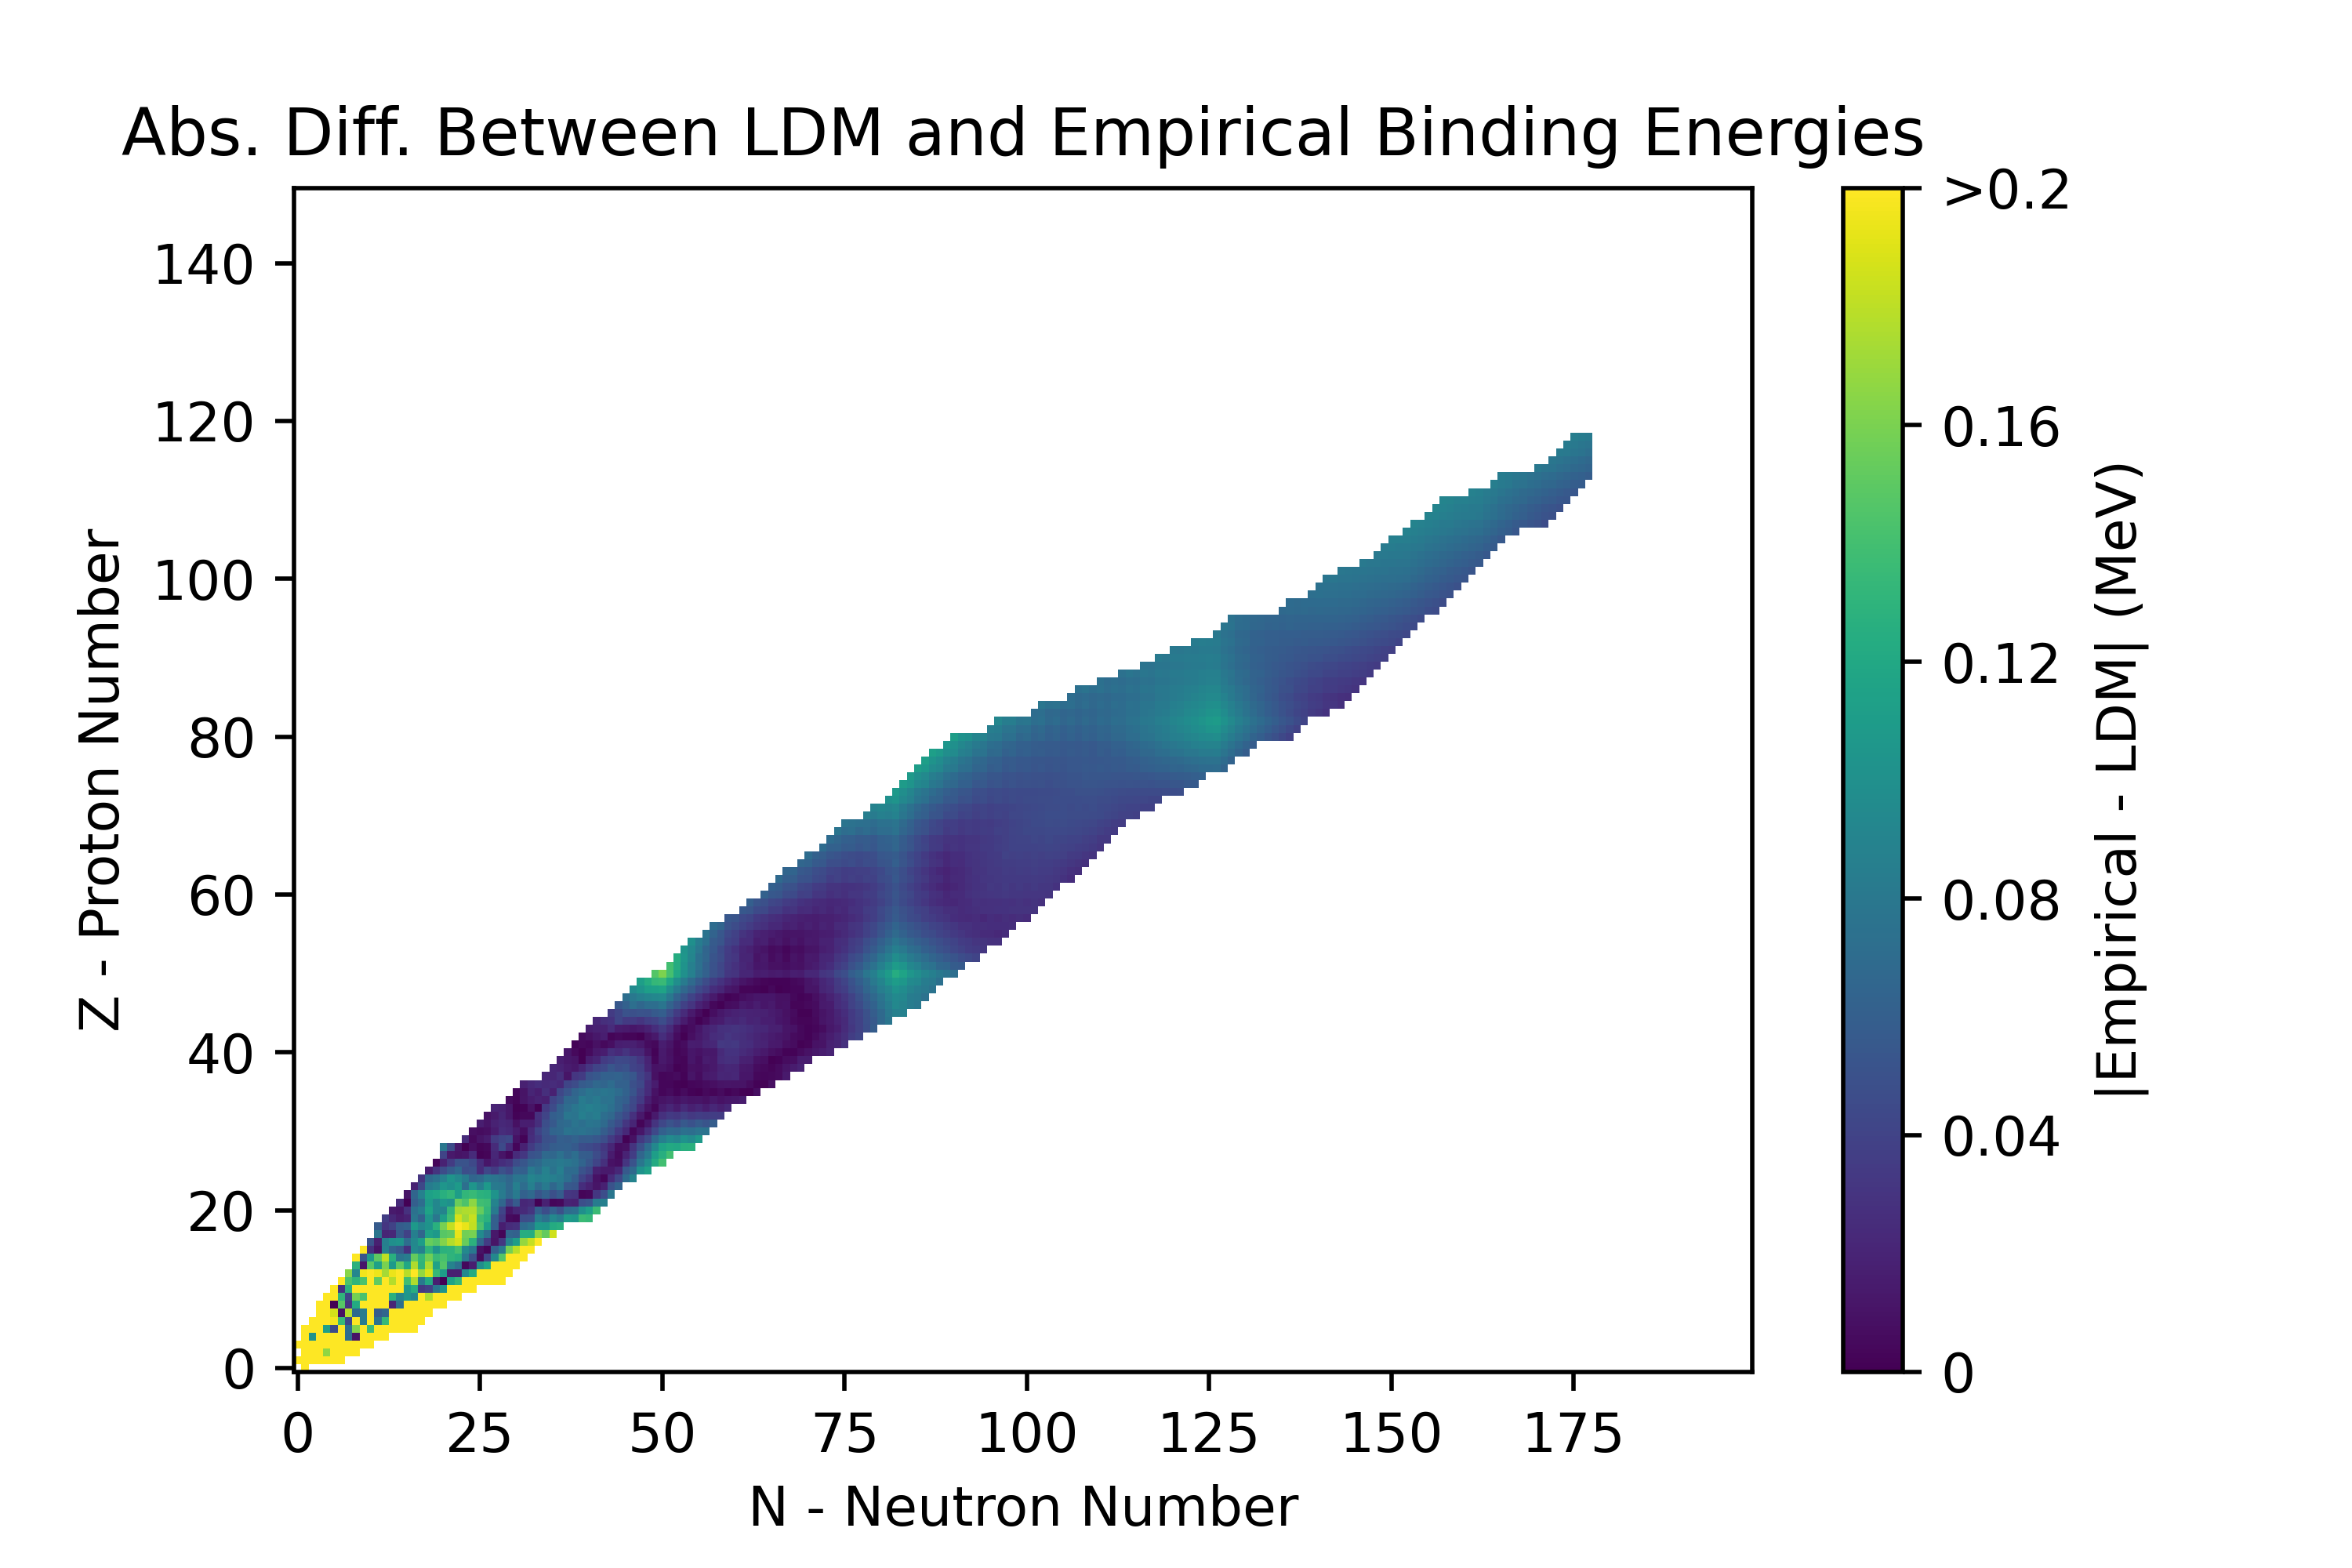

<Figure size 432x288 with 0 Axes>

In [8]:
#Calculate the absolute difference
diff = numpy.abs( empirical_binding_energies - LDM_binding_energies )

#Plot the absolute difference
plot.imshow( diff, origin='lower', aspect='auto', vmin=0.0, vmax=0.2 )
cbar = plot.colorbar() 
cbar.set_ticks( [0, 0.04, 0.08, 0.12, 0.16, 0.2] )
cbar.set_ticklabels( ['0', '0.04', '0.08', '0.12', '0.16', '>0.2'] )
cbar.set_label( '|Empirical - LDM| (MeV)' )
plot.set_cmap( 'viridis' ) #Pick a perceptually uniform color map
plot.title( 'Abs. Diff. Between LDM and Empirical Binding Energies' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )
plot.savefig( 'binding_energies_differences.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'binding_energies_differences.png' )

The agreement is generally very good! The difference between the two is well below 5% for $Z$ > 15. However, we do see some discrepant trends. Both figures (especially the absolute difference figure) show greater differences near the lines $Z$ = 28, 50, and 82, and lines $N$ = 50, 82, and 126. 

In order to further investigate these lines, let's calculate the pairing gap for the nuclei using the empirical binding energies and the LDM binding energies and compare. The pairing gap is measure of how the binding energy of the nucleus changes if a neutron is added or removed from the nucleus. It's calculated as:

\begin{equation}
\Delta = (-1)^N\, \frac{1}{2}\, [2 B(Z,A) - B(Z,A-1) - B(Z,A+1)]
\end{equation}

Calculate the pairing gap using empirical binding energies and LDM binding energies and compare:

In [9]:
#Make empty matrices to store the empirical and LDM pairing gaps
empirical_pairing_gaps = numpy.zeros( (150,200) ) * numpy.nan
LDM_pairing_gaps = numpy.zeros( (150,200) ) * numpy.nan

#Fill the matrices with the empirical and LDM binding energies
for nucleus in nuclei:
    Z = nucleus[0]
    A = nucleus[1]
    N = A - Z
    
    try:
        delta = ((-1)**N) * 0.5 * ( 2 * empirical_binding_energy( Z, A ) - empirical_binding_energy( Z, A-1 ) - empirical_binding_energy( Z, A+1 ) )
        empirical_pairing_gaps[Z,N] = delta
    except TypeError as e:
        #This TypeError means that either the nuclei with Z,A-1 or Z,A+1 don't have empirical binding energies
        #If so, skip this nucleus because we can't calculate it's empirical pairing gap
        continue

    delta = ((-1)**N) * 0.5 * ( 2 * LDM_binding_energy( Z, A ) - LDM_binding_energy( Z, A-1 ) - LDM_binding_energy( Z, A+1 ) )
    LDM_pairing_gaps[Z,N] = delta

Now plot the two matrices to see the comparison:

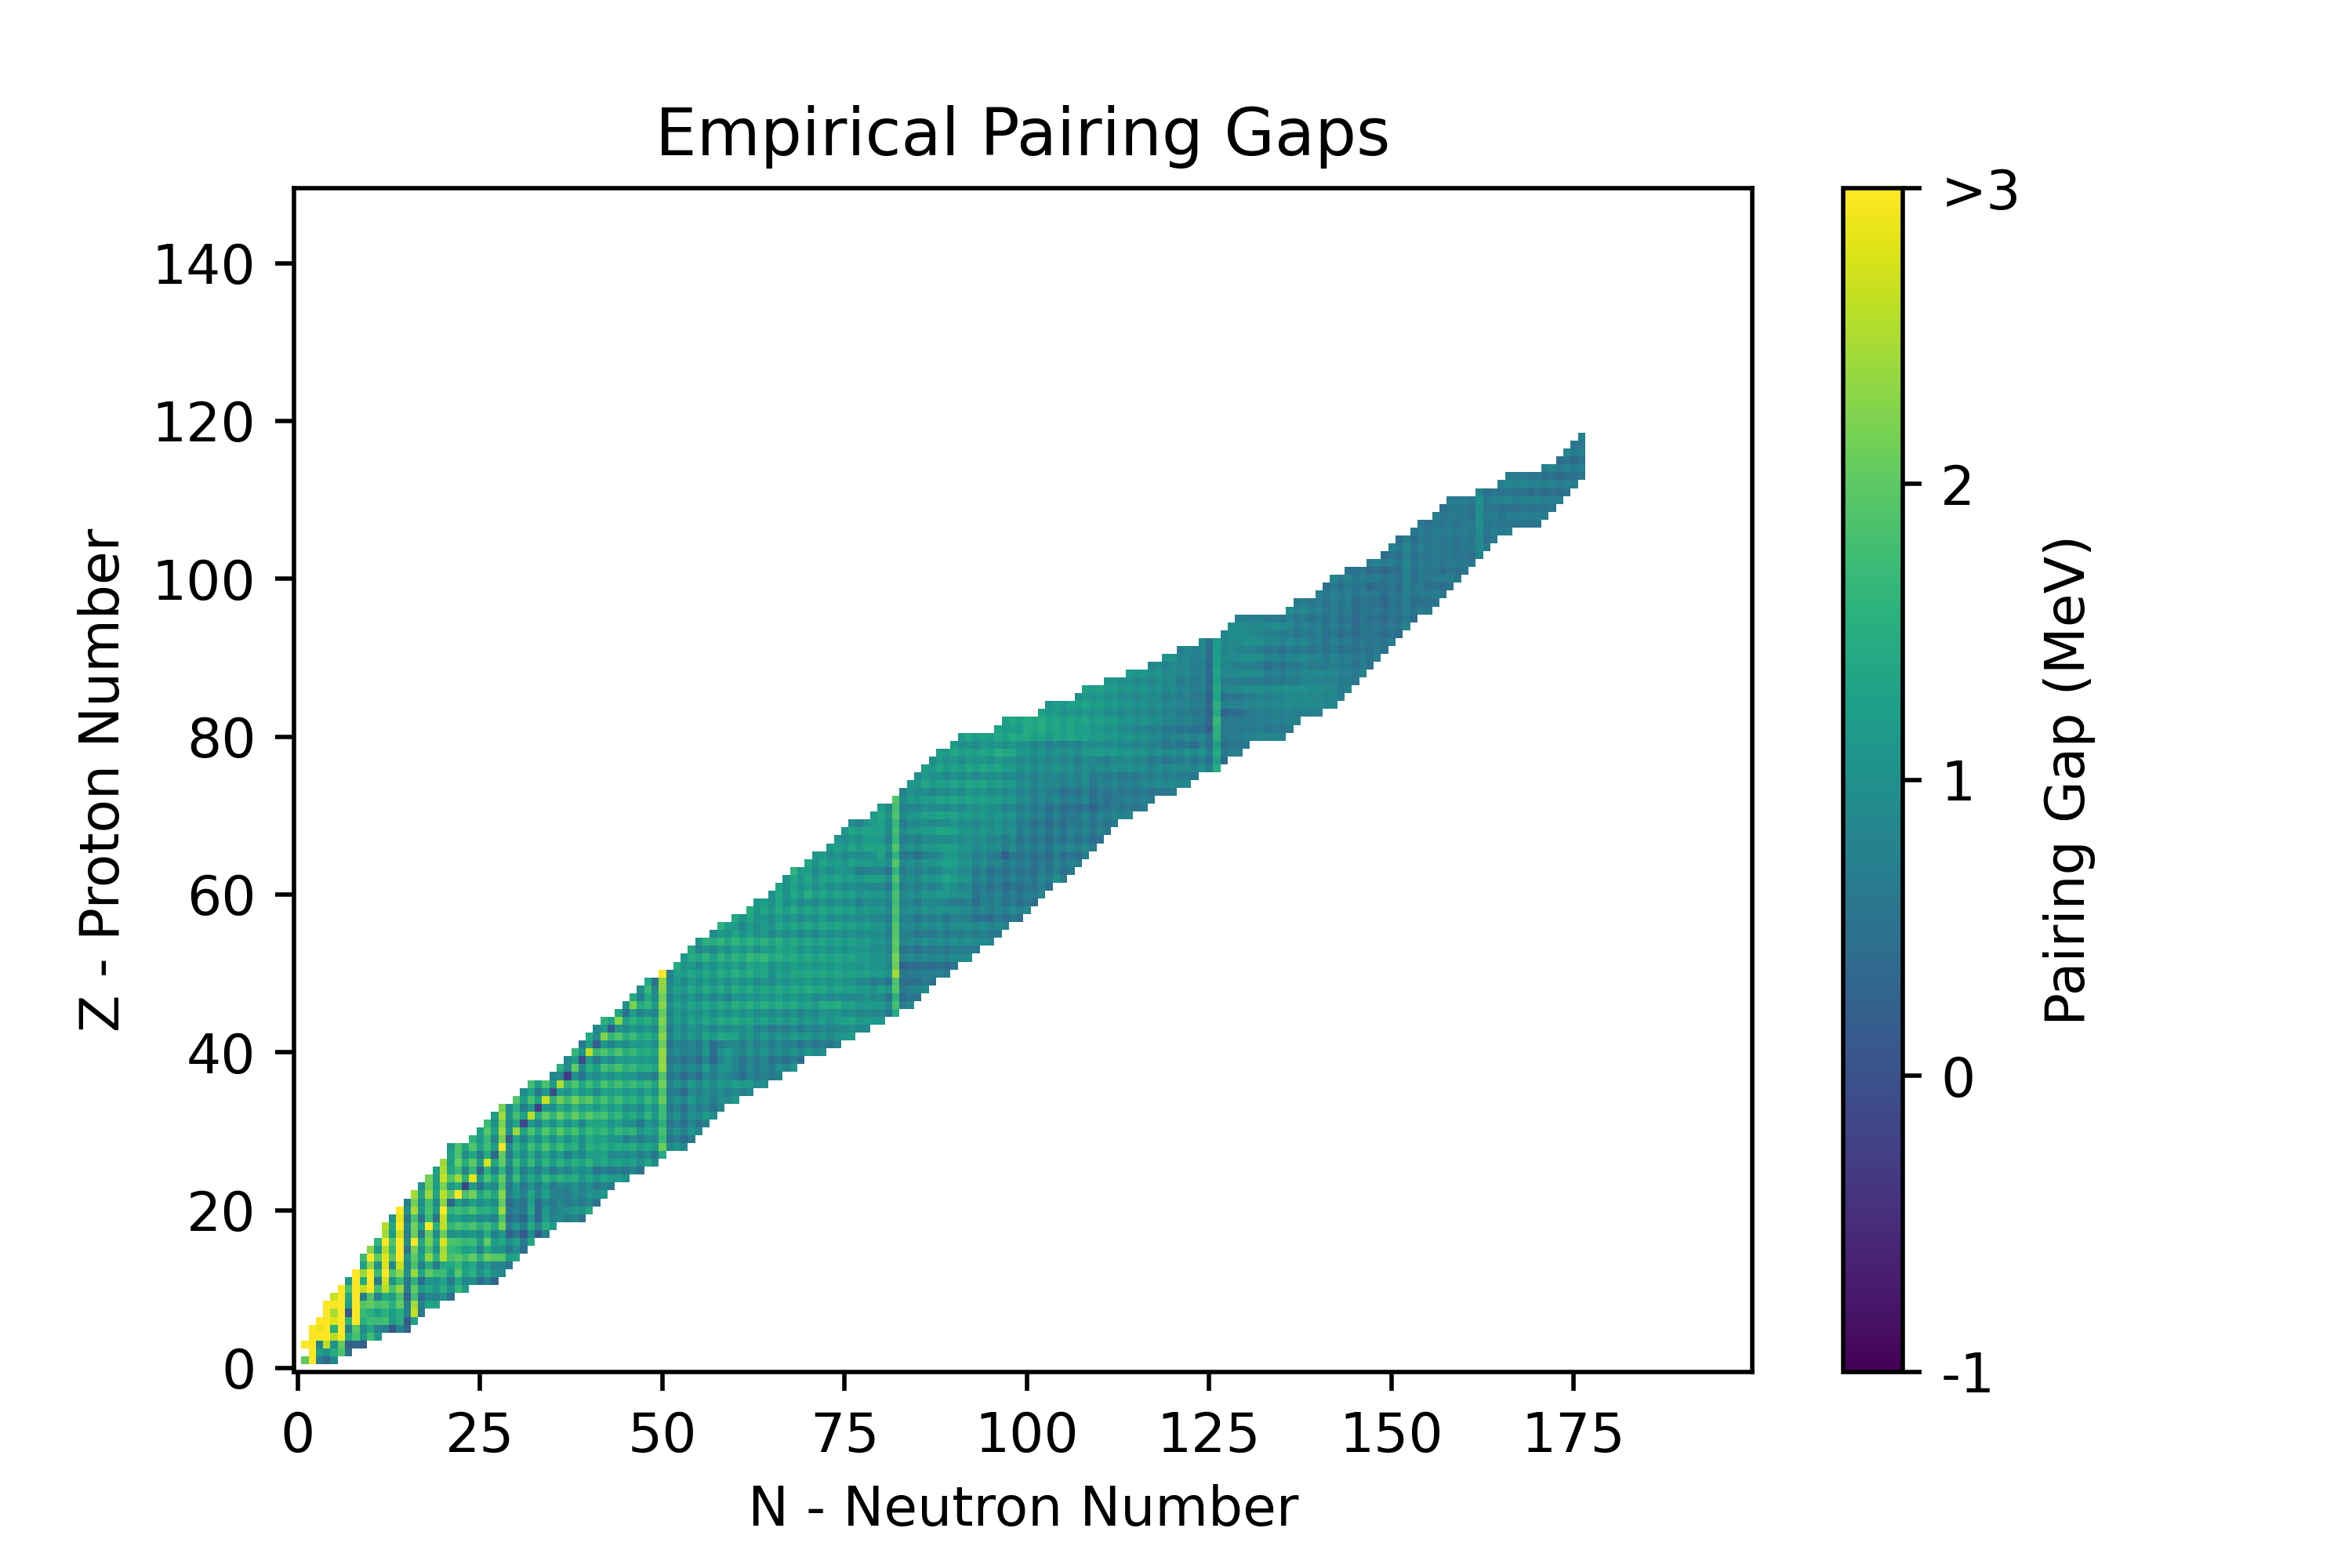

<Figure size 432x288 with 0 Axes>

In [10]:
#Plot the empirical pairing gaps
plot.imshow( empirical_pairing_gaps, origin='lower', aspect='auto', vmin=-1.0, vmax=3.0 )
cbar = plot.colorbar() 
cbar.set_ticks( [-1, 0, 1, 2, 3] )
cbar.set_ticklabels( ['-1', '0', '1', '2', '>3'] )
cbar.set_label( 'Pairing Gap (MeV)' )
plot.set_cmap('viridis') #Pick a perceptually uniform color map
plot.title( 'Empirical Pairing Gaps' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )
plot.savefig( 'empirical_pairing_gaps.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'empirical_pairing_gaps.png' )

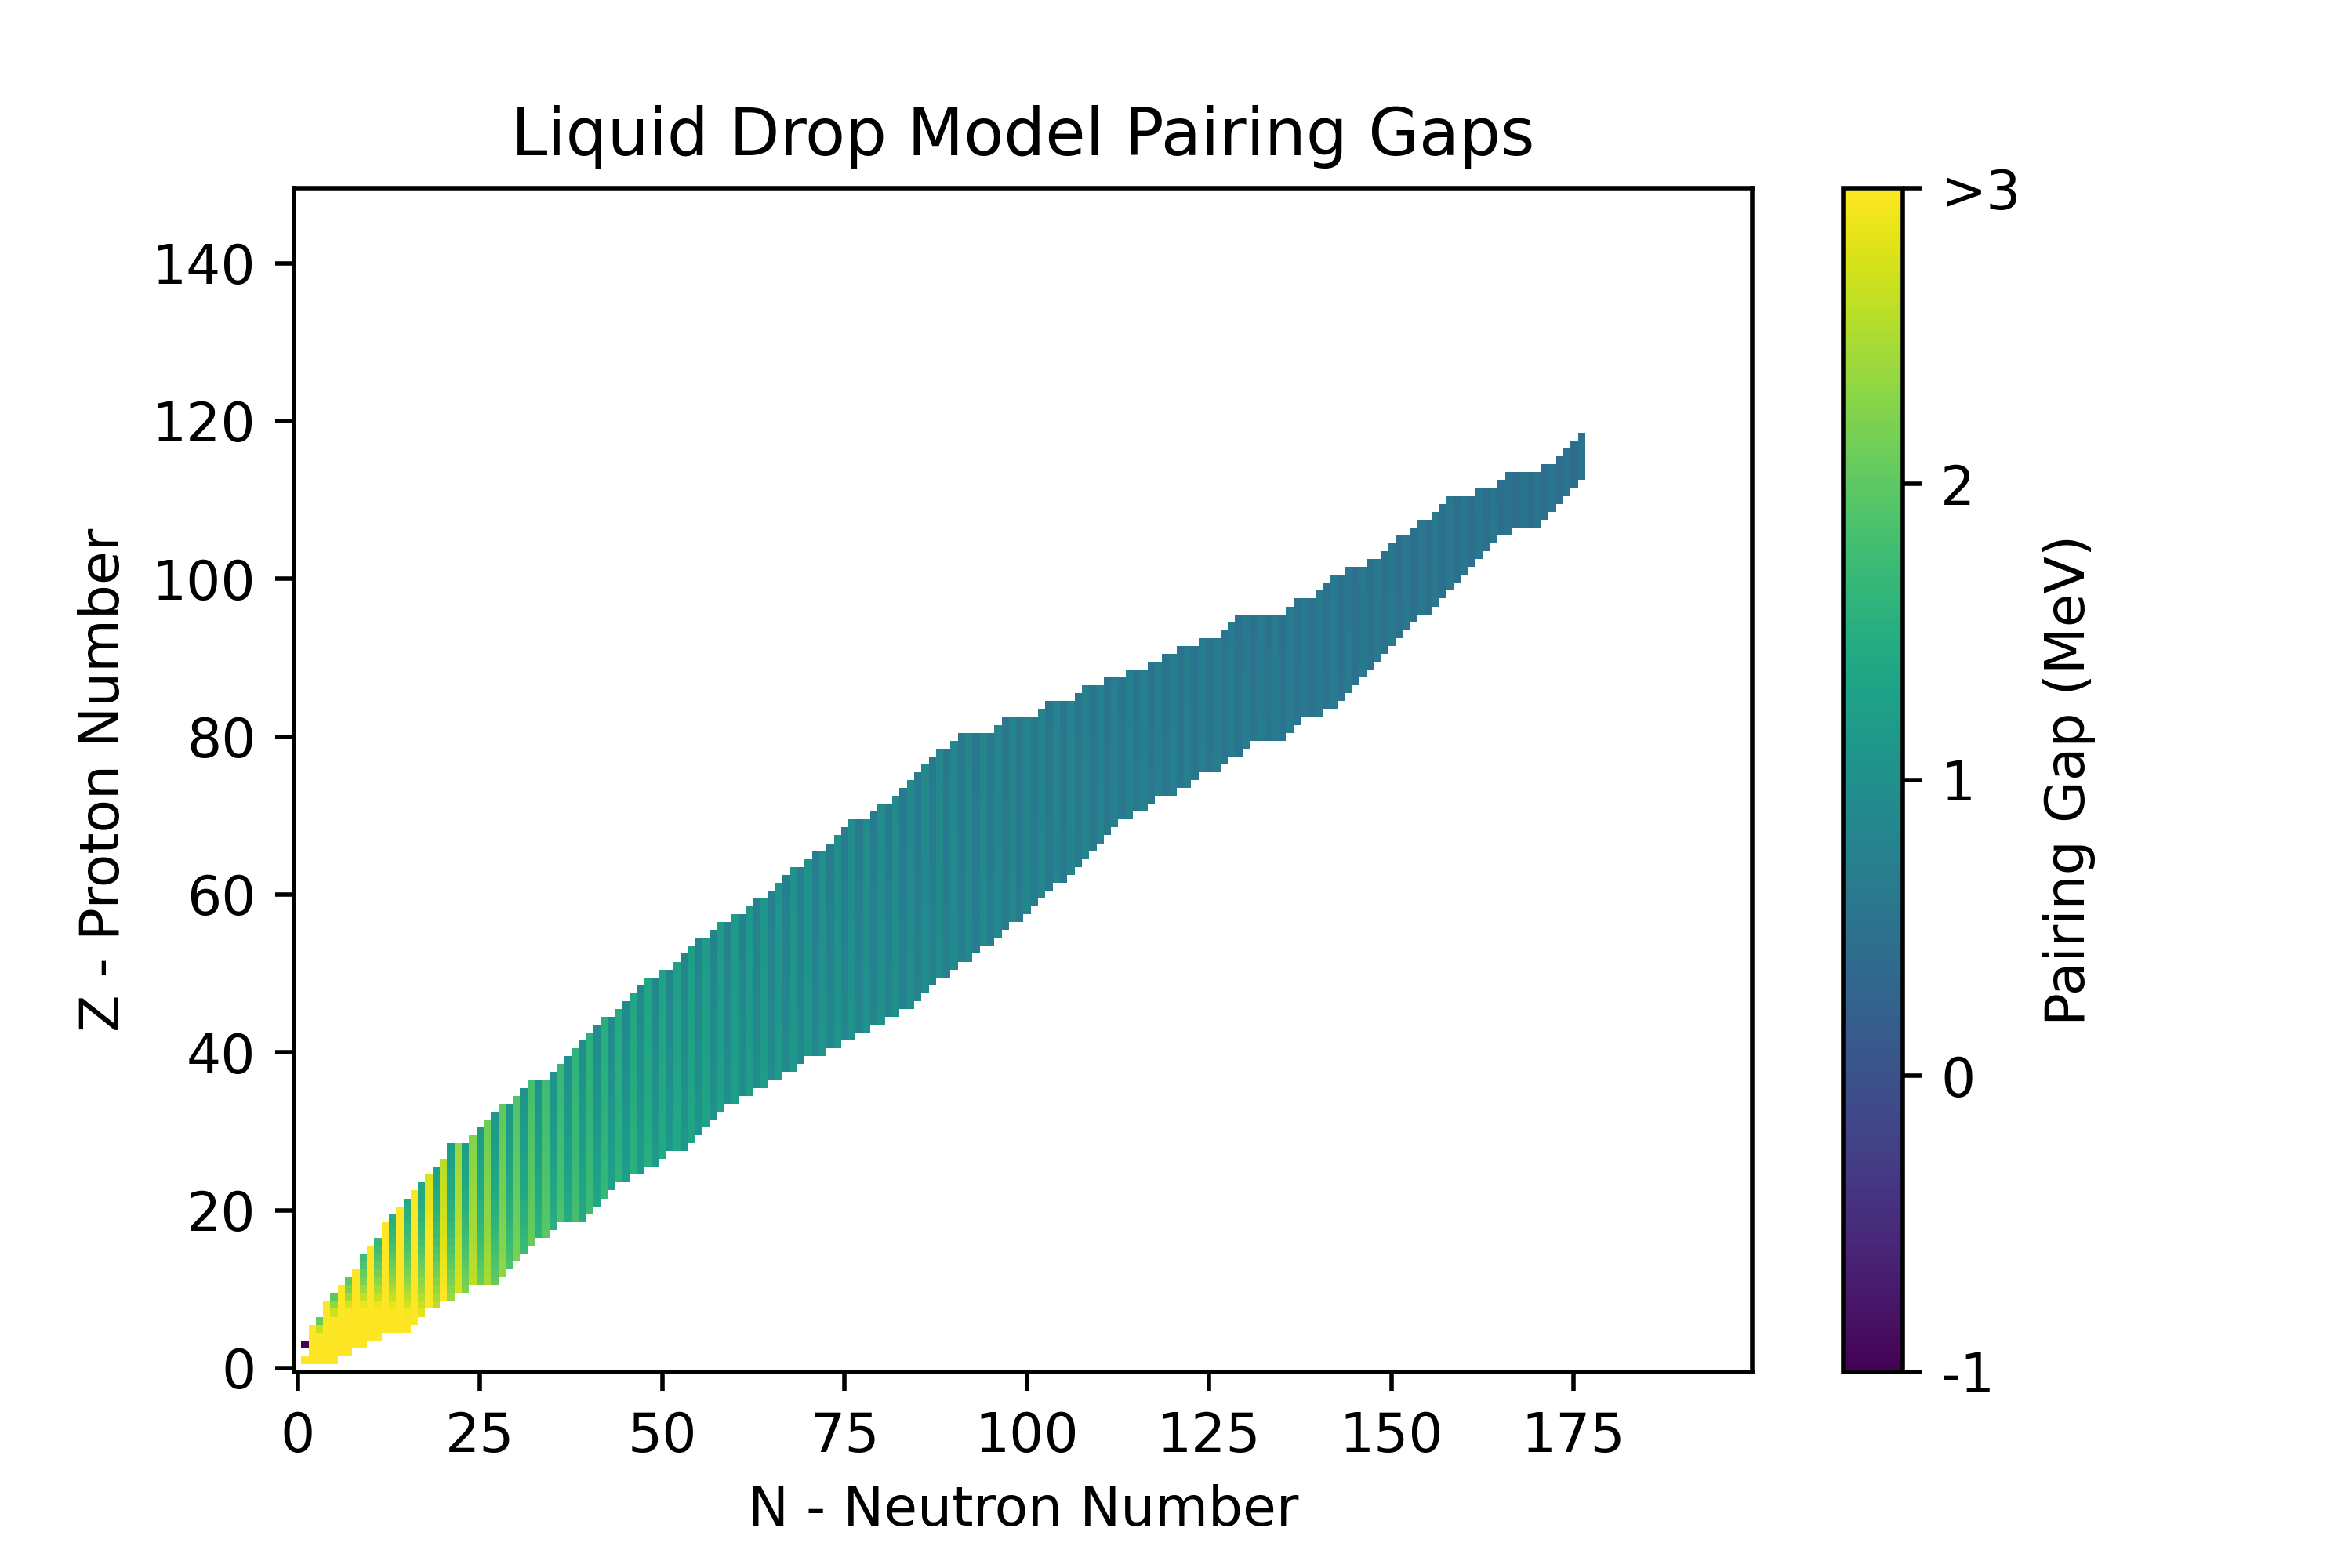

<Figure size 432x288 with 0 Axes>

In [11]:
#Plot the LDM pairing gaps
plot.imshow( LDM_pairing_gaps, origin='lower', aspect='auto', vmin=-1.0, vmax=3.0 )
cbar = plot.colorbar() 
cbar.set_ticks( [-1, 0, 1, 2, 3] )
cbar.set_ticklabels( ['-1', '0', '1', '2', '>3'] )
cbar.set_label( 'Pairing Gap (MeV)' )
plot.set_cmap('viridis') #Pick a perceptually uniform color map
plot.title( 'Liquid Drop Model Pairing Gaps' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )
plot.savefig( 'LDM_pairing_gaps.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'LDM_pairing_gaps.png' )

The empirical data shows strongly enhanced pairing gaps for $N$ = 20, 28, 50, 82, and 126, but these are not reflected in the LDM pairing gaps. This demonstrates some of the shortcomings of the LDM. 

Now let's determine the line of stability. We can do this by taking the first derivative of the LDM w.r.t. $Z$ and finding where it's zero. 

Define a function for the first derivative of the LDM w.r.t. $Z$:

In [12]:
def LDM_binding_energy_derivative_wrt_Z( Z, A ):
    #Define the model parameters
    a_V = 15.5 #MeV
    a_S = 16.8 #MeV
    a_C = 0.72 #MeV
    a_A = 23.0 #MeV
    a_P = 34.0 #MeV
    
    #Calculate the derivatives of each term w.r.t. Z
    volume_term = 0.0
    surface_term = 0.0
    coulomb_term = a_C * (2*Z - 1) / (A**(1/3))
    asymmetry_term = a_A * ( (8*Z / A) - 4 )
    pairing_term = 0.0
    
    #Calculate the binding energy from the terms
    B = volume_term - surface_term - coulomb_term - asymmetry_term + pairing_term
    
    return B

Numerically find the zero-crossing of the LDM first derivative. This can be done by calculating the first derivative w.r.t. $Z$ for each nucleus and finding the value closest to zero for each $Z$ chain:

In [13]:
#Calculate the LDM first derivative w.r.t. Z for each nucleus
#Find the lowest (absolute) value for this derivative at each Z
stability_line = {}
lowest_values = {}
for nucleus in nuclei:
    Z = nucleus[0]
    A = nucleus[1]
    
    der = LDM_binding_energy_derivative_wrt_Z( Z, A )
    
    try:
        if( abs(der) < lowest_values[Z] ):
            stability_line[Z] = A - Z
            lowest_values[Z] = abs(der)
    except KeyError as e:
        stability_line[Z] = A - Z
        lowest_values[Z] = abs(der)

Now plot the line of stability over the empirical binding energies chart:

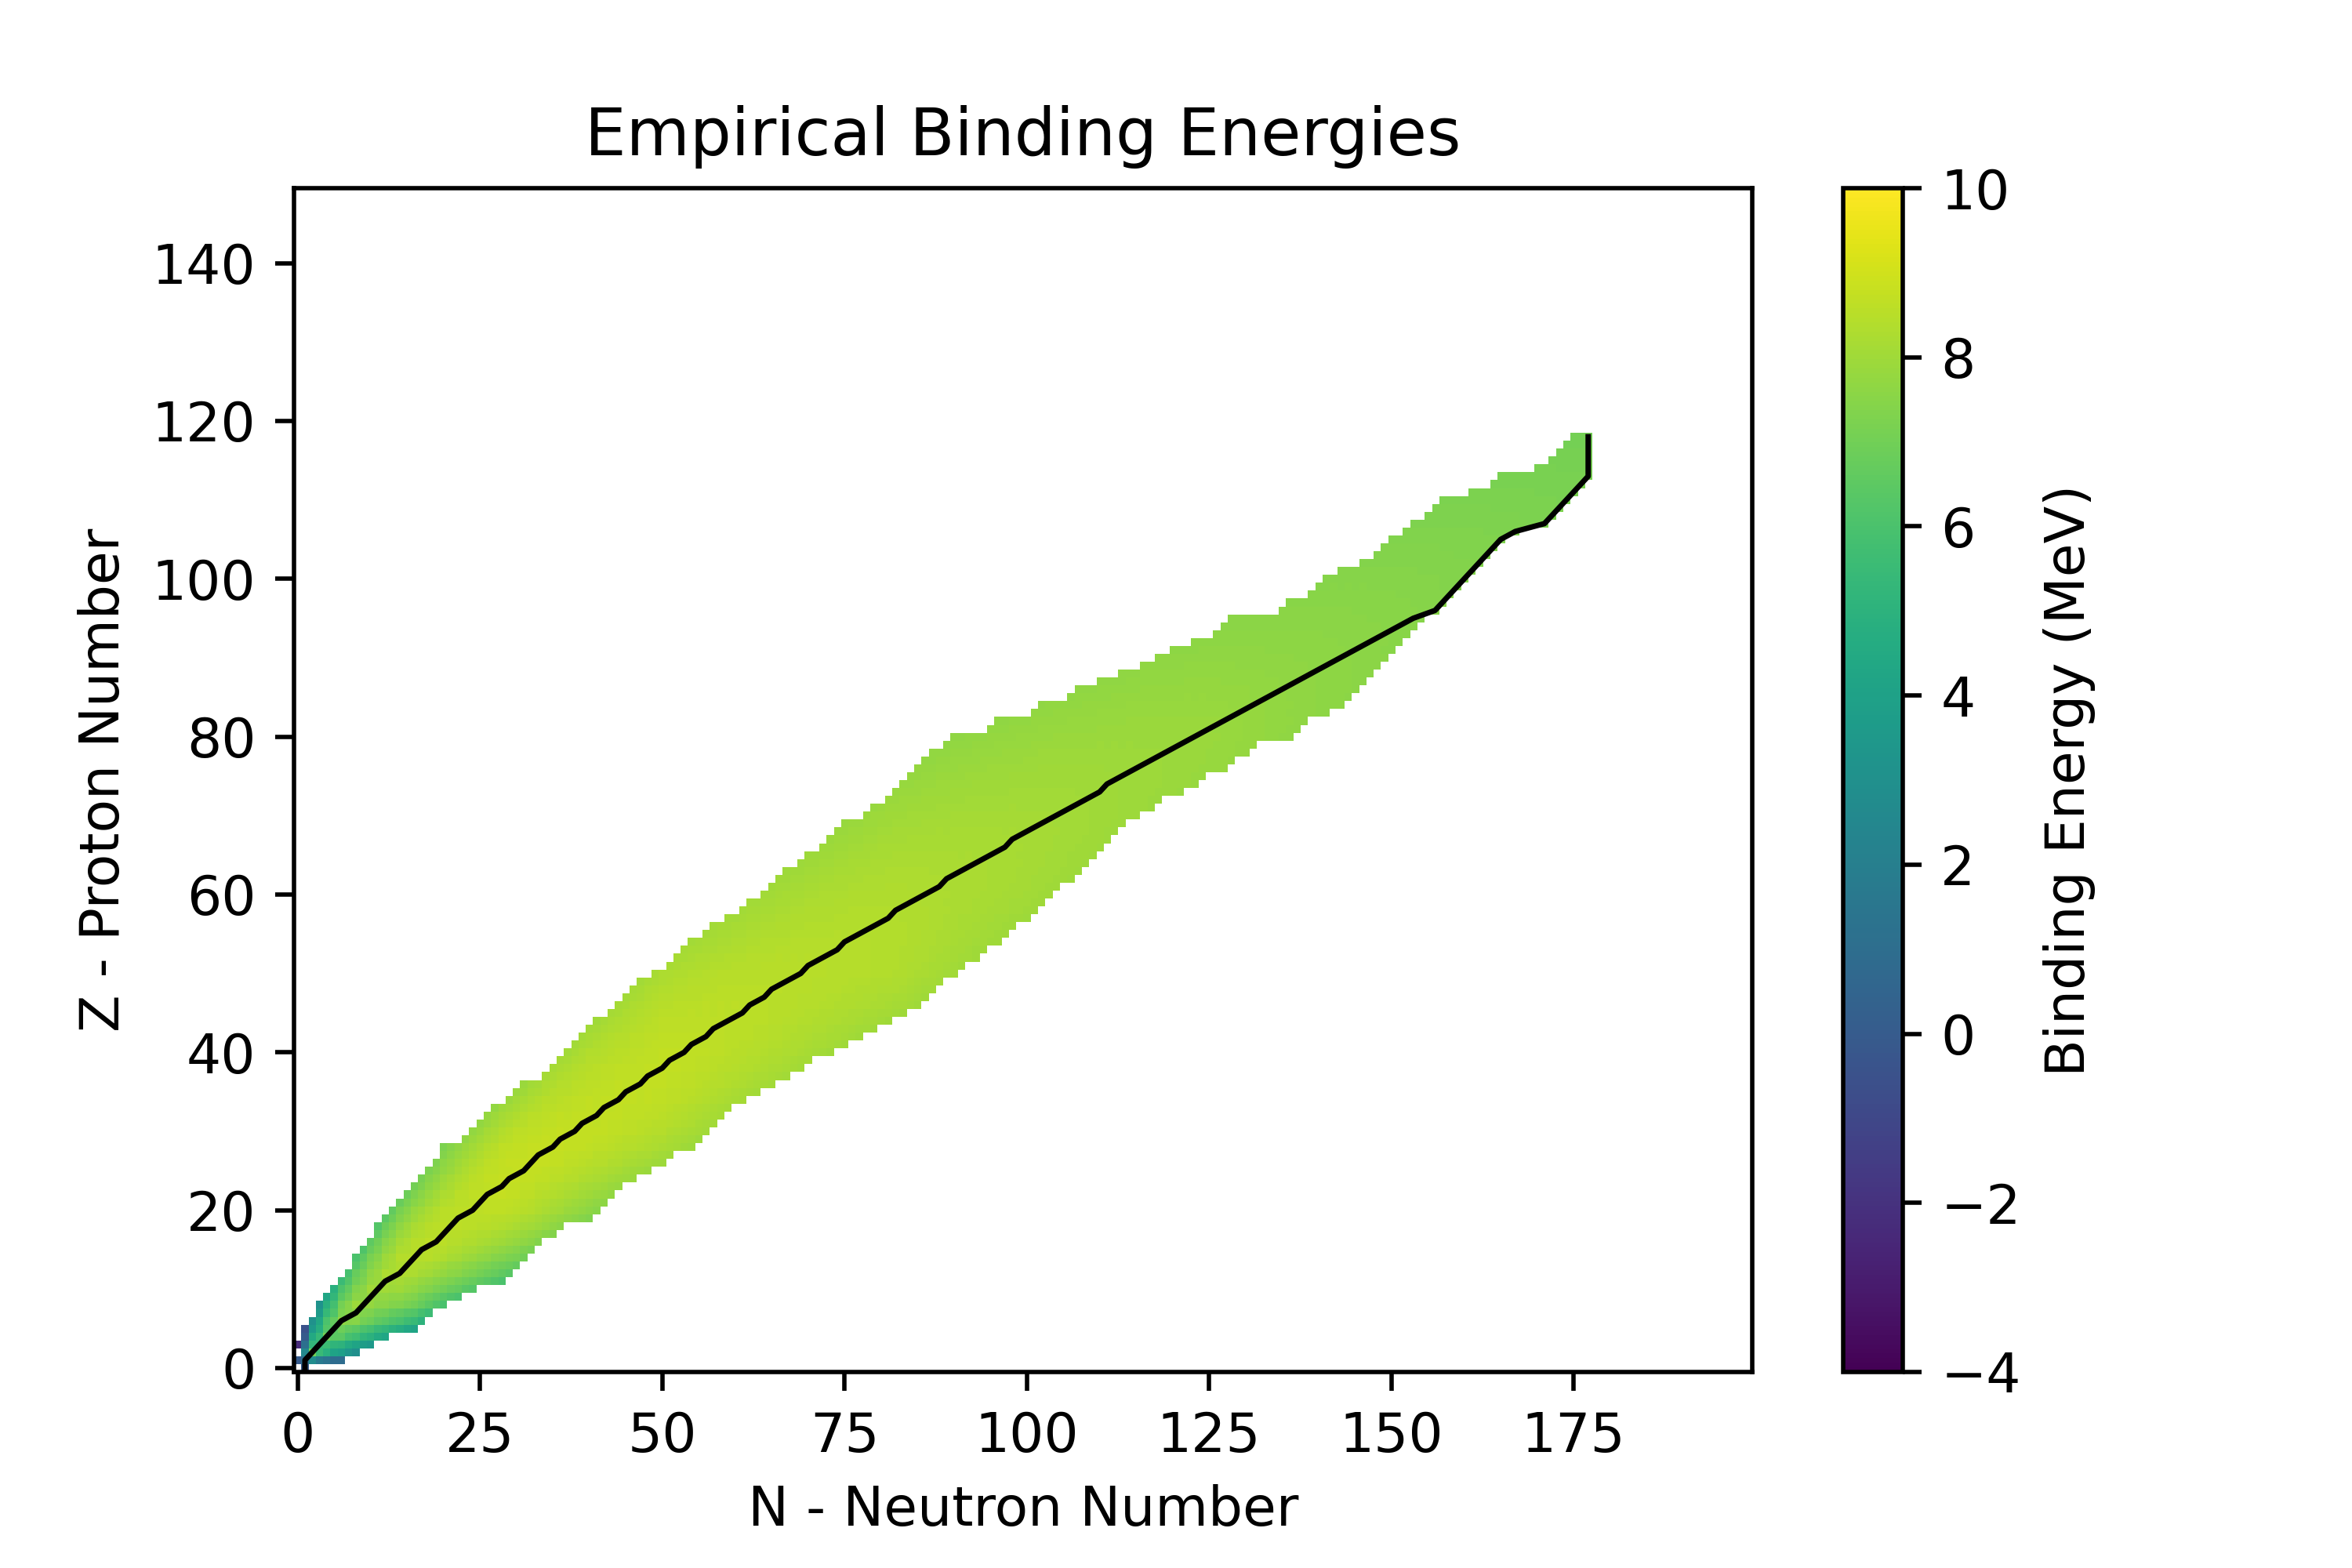

<Figure size 432x288 with 0 Axes>

In [14]:
#Plot the empirical binding energies
plot.imshow( empirical_binding_energies, origin='lower', aspect='auto', vmin=-4.0, vmax=10.0 )
cbar = plot.colorbar() 
cbar.set_label( 'Binding Energy (MeV)' )
plot.set_cmap('viridis') #Pick a perceptually uniform color map
plot.title( 'Empirical Binding Energies' )
plot.xlabel( 'N - Neutron Number' )
plot.ylabel( 'Z - Proton Number' )

#Plot the line of stability
stability_Z = list( stability_line.keys() )
stability_N = []
for Z in stability_Z:
    stability_N.append( stability_line[Z] )
plot.plot( stability_N, stability_Z, 'k-', linewidth=1.0 )

#Save the figure
plot.savefig( 'stability_line.png', dpi=500 )
plot.clf()

#Display the plot
Image( 'stability_line.png' )